### Integrantes do grupo:
Luca Coutinho Melão

Thiago de Donato Youssef

Artur Reppucci Vaz de Lima

Vitor Fortes Giuliano Riccetti
### Turma B

## Leitura do Dataset
Aqui são realizados os imports necessários para o projeto e a leitura do dataset.

In [65]:
'''
Importando as bibliotecas necessárias para o trabalho
'''
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [66]:
'''
Leitura do dataset
'''

filename = 'heart_failure_clinical_records_dataset.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo heart_failure_clinical_records_dataset.csv, tudo certo para prosseguir com o projeto!


## A. Introdução do projeto

O objetivo do projeto é a elaboração de um Machine Learning que realiza a predição da mortalidade de pacientes por parada cardíaca/problemas cardiovasculares. Deseja-se prever uma informação numérica que remete ao risco de morte, portanto, trata-se de um target quantitativo. 

Com isso, é possível prever casos futuros em que um novo paciente/cliente venha a apresentar o problema no futuro para conduzi-lo ao tratamento antecipado e evitar a falência. Em outro contexto, isso também pode alertar uma seguradore do risco de um cliente acionar o seguro de vida, e a partir disso permitir que ela tome medidas com relação a precificação do mesmo.

O dataset adotado é descrito abaixo, e apresenta 12 features que contribuem para nosso modelo.

# B. Minerando Dados e Características do Dataset 

### Heart failure clinic data

Entre as muitas competições disponíveis na plataforma Kaggle, encontra-se a de *Machine Learning* de casos de parada cardíaca conforme apresentado neste [link](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

A base de dados apresentada no arquivo contém informação de 298 pacientes para os quais foram mensurados os seguintes parâmetros (as categorias serão mantidas em inglês assim como os nomes das variáveis):
 
 * `age`: indica a idade do paciente.
 * `anaemia`: indica se paciente tem anemia. (boolean)
    - 0 = No,
    - 1 = Yes.
 * `creatinine_phosphokinase`: indica  o nível de enzima CPK no sangue em (mcg/L).
 * `diabetes`: indica se o paciente tem diabetes. (boolean)
    - 0 = No,
    - 1 = Yes.
 * `ejection_fraction`: porcentagem do sangue que deixa o coração a cada contração.
 * `high_blood_pressure`: indica se o paciente tem hipertensão ou não. (boolean)
    - 0 = No, 
    - 1 = Yes. 
 * `platelets`: número de plaquetas no sangue do paciente (kiloplatelets/mL).
 * `serum_creatinine`: nível de cretinina sérica no sangue do paciente (mg/dL).
 * `serum_sodium`: nível de sódio sérico no sangue (mEq/L).
 * `sex`: indica se o paciente é do sexo masculino ou feminino. (boolean)
    - 0 = Feminino, 
    - 1 = Masculino.
 * `smoking`: indica se o paciente é fumante. (boolean)
    - 0 = No, 
    - 1 = Yes. 
 * `DEATH_EVENT`: indica se o paciente morreu. (boolean)
    - 0 = No, 
    - 1 = Yes.

#### Leitura do dataset que contém dados do problema estudado.

In [67]:
# Carregando base de dados
dados = pd.read_csv(filename)
# Retirando a coluna 'time', já que o grupo decidiu que ela não carrega informações relevantes
dados = dados[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','DEATH_EVENT']]
dados

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  DEATH_EVENT  
0          0            1  
1          0            1  
2          1            1  
3          0            1  
4          0            1  
..       ...          ...  
294        1            0  
295        0            0  
296        0            0  
297        1            0  
298        1            0  

[299 rows x 12 columns]

#### Filtros para exploração do dataset.
Os filtros contribuem para que analisemos como cada parâmetro afeta nossa análise.

In [109]:
# Filtro por sexo:
filtro_mulher = dados['sex'] == 0
filtro_homem = dados['sex'] == 1

# Filtro sobrevivente:
filtro_sobrevivente = dados['DEATH_EVENT'] == 0
filtro_n_sobrevivente = dados['DEATH_EVENT'] == 1

# Filtro fumantes:
filtro_n_fumante = dados['smoking'] == 0
filtro_fumante = dados['smoking'] == 1

# Filtro hipertensao:
filtro_n_hipertensao = dados['high_blood_pressure'] == 0
filtro_hipertensao = dados['high_blood_pressure'] == 1


In [69]:
# Sobreviventes e não sobreviventes
surv = dados.loc[filtro_sobrevivente]
nao_surv = dados.loc[filtro_n_sobrevivente]

#  Mulheres (sobreviventes/não sobreviventes)
mulher_surv = dados.loc[filtro_mulher & filtro_sobrevivente]
mulher_nao_surv = dados.loc[filtro_mulher & filtro_n_sobrevivente]

# Homens ((sobreviventes/não sobreviventes))
homem_surv = dados.loc[filtro_homem & filtro_sobrevivente]
homem_nao_surv = dados.loc[filtro_homem & filtro_n_sobrevivente]

# Fumantes e não fumantes
fum = dados.loc[filtro_fumante]
n_fum = dados.loc[filtro_n_fumante]

# Com hipertensão e sem hipertensão
hip = dados.loc[filtro_hipertensao]
n_hip = dados.loc[filtro_n_hipertensao]

In [70]:
# Usando o comando '.describe()' para analisar cada coluna 

dados_surv = surv.describe()
dados_nao_surv = nao_surv.describe()

dados_mulheres_surv = mulher_surv.describe()
dados_mulheres_nao_surv = mulher_nao_surv.describe()

dados_homens_surv = homem_surv.describe()
dados_homens_nao_surv = homem_nao_surv.describe() 


In [71]:
# Função que realiza a regressão com uma constante adicionada

def regress_logistic(X,Y):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X_cp)
    results = model.fit()
    return results


In [72]:
# Filtrando as colunas da base de dados para outro dataframe que será usado.
df = dados[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','DEATH_EVENT']]


### Visualizando o describe para pacientes que sobreviveram e para os que não sobreviveram, respectivamente.

Essa visualização nos permite ter uma noção das medidas de dispersão das diferentes features adotadas no modelo.

In [73]:
# Análise das pessoas que sobreviveram:

dados_surv

age     anaemia  creatinine_phosphokinase    diabetes  \
count  203.000000  203.000000                203.000000  203.000000   
mean    58.761906    0.408867                540.054187    0.418719   
std     10.637890    0.492840                753.799572    0.494569   
min     40.000000    0.000000                 30.000000    0.000000   
25%     50.000000    0.000000                109.000000    0.000000   
50%     60.000000    0.000000                245.000000    0.000000   
75%     65.000000    1.000000                582.000000    1.000000   
max     90.000000    1.000000               5209.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         203.000000           203.000000     203.000000   
mean           40.266010             0.325123  266657.489901   
std            10.859963             0.469579   97531.202283   
min            17.000000             0.000000   25100.000000   
25%            35.000000             0.000000  219500.000000   
50%            38.000000             0.000000  263000.000000   
75%            45.000000             1.000000  302000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex     smoking  DEATH_EVENT  
count        203.000000    203.000000  203.000000  203.000000        203.0  
mean           1.184877    137.216749    0.650246    0.325123          0.0  
std            0.654083      3.982923    0.478071    0.469579          0.0  
min            0.500000    113.000000    0.000000    0.000000          0.0  
25%            0.900000    135.500000    0.000000    0.000000          0.0  
50%            1.000000    137.000000    1.000000    0.000000          0.0  
75%            1.200000    140.000000    1.000000    1.000000          0.0  
max            6.100000    148.000000    1.000000    1.000000          0.0

In [74]:
# Análise das pessoas não sobreviveram:

dados_nao_surv

age    anaemia  creatinine_phosphokinase   diabetes  \
count  96.000000  96.000000                 96.000000  96.000000   
mean   65.215281   0.479167                670.197917   0.416667   
std    13.214556   0.502188               1316.580640   0.495595   
min    42.000000   0.000000                 23.000000   0.000000   
25%    55.000000   0.000000                128.750000   0.000000   
50%    65.000000   0.000000                259.000000   0.000000   
75%    75.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               7861.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          96.000000             96.00000      96.000000   
mean           33.468750              0.40625  256381.044792   
std            12.525303              0.49371   98525.682856   
min            14.000000              0.00000   47000.000000   
25%            25.000000              0.00000  197500.000000   
50%            30.000000              0.00000  258500.000000   
75%            38.000000              1.00000  311000.000000   
max            70.000000              1.00000  621000.000000   

       serum_creatinine  serum_sodium        sex    smoking  DEATH_EVENT  
count         96.000000     96.000000  96.000000  96.000000         96.0  
mean           1.835833    135.375000   0.645833   0.312500          1.0  
std            1.468562      5.001579   0.480771   0.465946          0.0  
min            0.600000    116.000000   0.000000   0.000000          1.0  
25%            1.075000    133.000000   0.000000   0.000000          1.0  
50%            1.300000    135.500000   1.000000   0.000000          1.0  
75%            1.900000    138.250000   1.000000   1.000000          1.0  
max            9.400000    146.000000   1.000000   1.000000          1.0

Antes de prosseguir, é necessário se assegurar de que não há valores nulos ou vazios na nossa base de dados.

In [75]:
# Verificando se há valaroes nulos no dataset:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

Pelo resultado obtido, concluimos que não há valores nulos.

Agora vamos montar alguns **histogramas** para analisar como cada variável se comporta. Importante destacar que nessa parte a análise será feita apenas com as variáveis ***age, ejection_fraction, platelets e serum_sodium***, já que foram as que consideramos mais relevantes para nosso objetivo.

Entretanto, para analisarmos melhor as informações, iremos usar o comando duas vezes, para ambos sexos, primeiro no das pessoas que não faleceram e depois no das que faleceram. Desse modo, será mais fácil enxergar os fatores predominantes na morte de alguém por doenças cardiovasculares.

##### Histograma para os homens que não faleceram

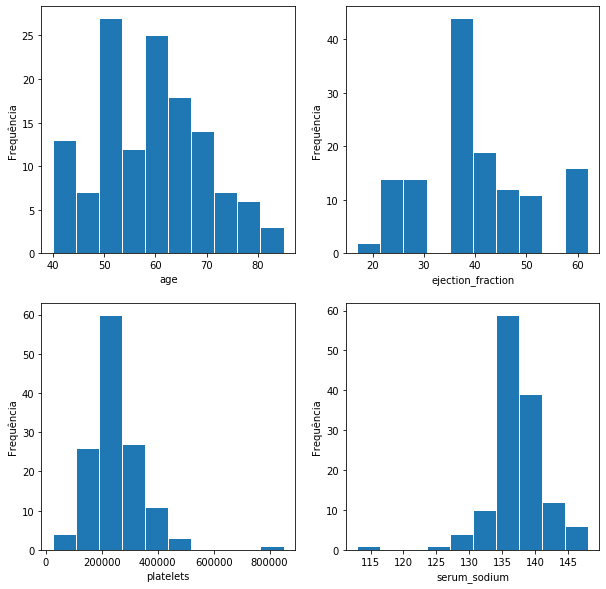

In [76]:
# Criando histogramas
sb_plot = 1
plt.figure(figsize=(10,10))
lista = ['age','ejection_fraction','platelets','serum_sodium']
for i in lista:
    plt.subplot(2,2,sb_plot)
    plt.hist(homem_surv[i], edgecolor='WHITE')
    plt.xlabel('{0}'.format(i))
    plt.ylabel('Frequência')
    sb_plot+= 1

##### Histograma para os homens que faleceram

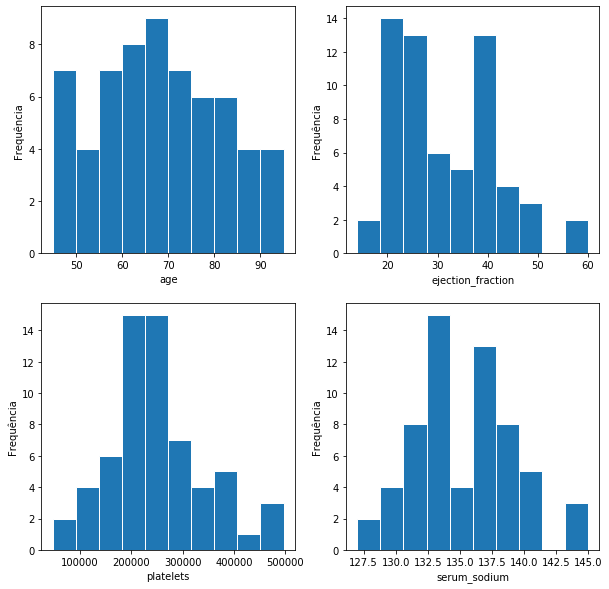

In [77]:
# Criando histogramas
sb_plot = 1
plt.figure(figsize=(10,10))
lista = ['age','ejection_fraction','platelets','serum_sodium']
for i in lista:
    plt.subplot(2,2,sb_plot)
    plt.hist(homem_nao_surv[i], edgecolor='WHITE')
    plt.xlabel('{0}'.format(i))
    plt.ylabel('Frequência')
    sb_plot+= 1

#### Histograma para as mulheres que não faleceram

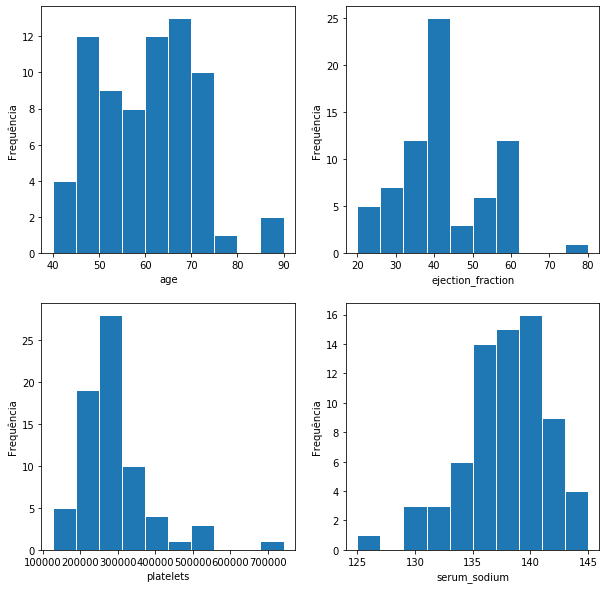

In [78]:
# Criando histogramas
sb_plot = 1
plt.figure(figsize=(10,10))
lista = ['age','ejection_fraction','platelets','serum_sodium']
for i in lista:
    plt.subplot(2,2,sb_plot)
    plt.hist(mulher_surv[i], edgecolor='WHITE')
    plt.xlabel('{0}'.format(i))
    plt.ylabel('Frequência')
    sb_plot+= 1

#### histograma para as mulheres que faleceram

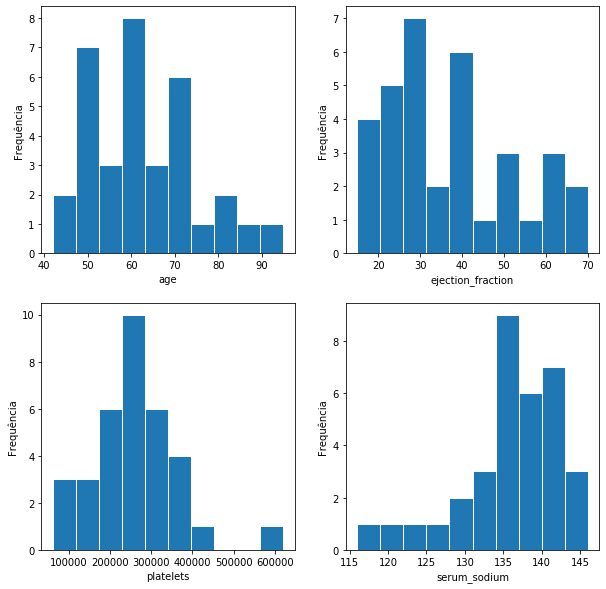

In [110]:
# Criando histogramas
sb_plot = 1
plt.figure(figsize=(10,10))
lista = ['age','ejection_fraction','platelets','serum_sodium']
for i in lista:
    plt.subplot(2,2,sb_plot)
    plt.hist(mulher_nao_surv[i], edgecolor='WHITE')
    plt.xlabel('{0}'.format(i))
    plt.ylabel('Frequência')
    sb_plot+= 1

# C. Modelos de Predição 

### Modelo adotado: Regressão Linear Múltipla

In [111]:
# Definindo X e Y 

X = df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure',
'platelets','serum_creatinine','serum_sodium','sex','smoking']] # features ou variáveis explicativas

Y = df[['DEATH_EVENT']] # target ou variável resposta


In [81]:
resultado_modelo = regress_logistic(X,Y)
resultado_modelo.summary()

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.2160
Time:                        22:20:23   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.9643      4.601      1.079      0.281      -4.054      13.982
age                          0.0557      0.013      4.241      0.000       0.030       0.081
anaemia                      0.4179      0.301      1.389      0.165      -0.172       1.008
creatinine_phosphokinase     0.0003      0.000      2.034      0.042    1.06e-05       0.001
diabetes                     0.1514      0.297      0.509      0.611      -0.431       0.734
ejection_fraction           -0.0703      0.015     -4.731      0.000      -0.099      -0.041
high_blood_pressure          0.4189      0.306      1.369      0.171      -0.181       1.019
platelets                -7.094e-07   1.62e-06     -0.439      0.661   -3.88e-06    2.46e-06
serum_creatinine             0.6619      0.173      3.817      0.000       0.322       1.002
serum_sodium                -0.0567      0.033     -1.698      0.090      -0.122       0.009
sex                         -0.3990      0.351     -1.137      0.255      -1.087       0.289
smoking                      0.1356      0.349      0.389      0.697      -0.548       0.819
============================================================================================
"""

## D. Processo e Estatísticas de Validação 

Calculando as medidas que informam a performance de cada modelo ajustado.

In [82]:
# Treinando e testando com os dados iniciais:
# Inicialmente, todas as features  do modelo estão s endo utilizadas
Xi = df[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure',
        'platelets','serum_creatinine','serum_sodium','sex','smoking']] # features ou variáveis explicativas

Yi = df[['DEATH_EVENT']]

# Criando a base de treinamento e de teste:
Xi_train, Xi_test, Yi_train, Yi_test = train_test_split(Xi, Yi, test_size=0.40, random_state=42)

### Aplicando a 1ª técnica: Regressão logística

In [98]:
# Treinando e testando nossa base de dados 
clf = LogisticRegression(random_state=0).fit(Xi_train, Yi_train)

accuracy = clf.score(Xi_test, Yi_test)
print(f'A accuracy do modelo foi de: {accuracy}')

A accuracy do modelo foi de: 0.5833333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia de 58,3% foi aceitável por estar acima de 50%.
Porém, buscando aprimorar o algoritmo, analisou-se a Summary acima e notou-se que tanto a `[platelets]` quanto `[smoke]` e `[diabetes]` estavam com o valor-P muito alto, e então foram retiradas das features a partir de uma nova filtragem das mesmas, visando melhoras no modelo.

In [84]:
# Filtragem a partir do summary acima, retirando platelets, smoke e diabetes 

X = df[['age','anaemia','creatinine_phosphokinase','ejection_fraction',
        'high_blood_pressure','serum_creatinine','serum_sodium','sex']]

Y = df[['DEATH_EVENT']]

In [85]:
# Criando a base de treinamento e a base de teste:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

In [99]:
# Treinando e testando nossa base de dados

clf = LogisticRegression(random_state = 0).fit(X_train, Y_train)

clf.score(X_test, Y_test)

accuracy = clf.score(X_test, Y_test)

print(f'A accuracy do modelo foi de: {accuracy}')

A accuracy do modelo foi de: 0.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [106]:
# Analisando se há overfitting.
clf.score(X_train, Y_train)


0.8100558659217877

Observando o resultado obtido com a comparaçãa da medida de acurácia para as duas partes dos dados (treino e teste), temos que a acurácia do modelo quando aplicado a base de treino é 1.0, e quando aplicado a base de teste é de 0.7. Isso pode indicar qu que o modelo está tendendo a um caso de overfitting. Isso ocorre quando o algoritmo modela muito bem a base de treino, bem até demais, já que isso impacta negativamente sua capacidade de generalização ao trata uma nova base de teste. Assim, o modelo funciona bem para a base de teste, mas não para novas bases.

### Aplicando a 2ª técnica: Confusion Matrix

O uso da matriz de confusão nos permite visualizar através de uma matriz, como sugere o próprio nome, o desempenho que o modelo teve na classificação. Ela possui a seguinte estrutura, respectivamente:

- Verdadeiro positivo (casos em que o classificador previu corretamente o output positivo).
- Falso positivo (casos em que o classificador previu incorretamente o output positivo).
- Falso negativo (casos em que o classificador previu incorretamente o output negativo).
- Verdadeiro negativo (casos em que o classificador previu corretamente o output negativo).

In [105]:
X = df[['age','anaemia','creatinine_phosphokinase','ejection_fraction',
        'high_blood_pressure','serum_creatinine','serum_sodium','sex']]

Y = df[['DEATH_EVENT']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

# Criando a predição.

y_train_pred = cross_val_predict(clf, X_train, Y_train, cv=3)
 
# Construindo uma matriz de confusão 

confusion_matrix(Y_train, y_train_pred)

# accuracy 90%
f1_score(Y_train, y_train_pred)

accuracy = f1_score(Y_train, y_train_pred)
print(f'A accuracy do modelo foi de: {accuracy}')

A accuracy do modelo foi de: 0.3939393939393939


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

In [108]:
# Visualizando a predição para o dataset de treinamento do modelo.
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

Como esperado, foi retornada uma lista de 0 e 1 na predição do modelo, indicando a sobrevivência ou não sobrevivência do paciente. 

In [90]:
confusion_matrix(Y_train, y_train_pred)

array([[126,   7],
       [ 33,  13]])

O modelo classifica melhor os verdadeiros negativos do que o restante, como mostra a matriz de confusão.

### Aplicando a Decision Tree

In [91]:
X = df[['age','anaemia','creatinine_phosphokinase','ejection_fraction',
        'high_blood_pressure','serum_creatinine','serum_sodium','sex']]

Y = df[['DEATH_EVENT']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

# classificador
clf = DecisionTreeClassifier()

# processo de treinamento
clf = clf.fit(X_train, Y_train)


y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, y_pred)
print(f'A accuracy do modelo foi de: {accuracy}')

A accuracy do modelo foi de: 0.6083333333333333


In [92]:
Y_predito = clf.predict(X_test)
confusion_matrix(Y_test, Y_predito)

array([[55, 15],
       [32, 18]])

Novamente, é possível notar pela matriz de confusão que o modelo classifica melhor os verdadeiros negativos do que o restante.

## E. Conclusão 

Pontos que precisamos abordar de forma clara nessa conclusão.
* Resultados das matrizes de confusão
* Como se deu o processo de seleção e filtragem das features.
* Overfitting
* Como é o desempenho do modelo? O que explica  isso? Como poderíamos melhorar?
* Foi possível responder a questão/problema inicial?

Reiterando o que já foi apontado ao longo do relatório, o desempenho do nosso modelo foi parcialmente satisfatório.

## F. Referências bibliográficas

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/